# 使用卡方统计量的检验回顾

## 开方的正确推广

我们知道，对于n元正态分布

$$
X \sim N(\mu,\Sigma)
$$

经变换有

$$
X'\Sigma^{-1}X \sim \chi^2(n)
$$

不妨假设这类矩阵(符合“矩阵平方根”的矩阵即使有，也不一定是唯一的，考虑单位矩阵容易想到)存在且可以保持对称性

$$
\Sigma^{-\frac{1}{2}} \Sigma^{-\frac{1}{2}} = \Sigma^{-1}
$$

于是有

$$
(\Sigma^{-\frac{1}{2}}X)'(\Sigma^{-\frac{1}{2}}X)
$$

回想卡方分布的定义，我们可以理解为矩阵$\Sigma^{-\frac{1}{2}}$实际是某种将各个正态变量的相关性全部消除并标准化的一个变换。
变换之后求平方和自然根据卡方分布定义就得到了。

我们指出下述方法的确可以帮我们找到至少一个符合条件的的$\Sigma^{-\frac{1}{2}}$

由于协方差矩阵是对称正定矩阵，所以存在分解

$$
\Sigma = P\Lambda P'
$$

其中$P$是由特征向量按列组成的一正交矩阵，而$\Lambda$是对应特征值构成的对角矩阵。由于$\Lambda$上各对角元必然是正的，所以存在唯一根矩阵。

$$
\Lambda^{\frac{1}{2}}\Lambda^{\frac{1}{2}} = \Lambda
$$

于是

$$
\Sigma = (P\Lambda^{\frac{1}{2}}) (P \Lambda^{\frac{1}{2}})'
$$

可以有

$$
\Sigma^{-1} = ((P \Lambda^{\frac{1}{2}})^{-1})' ((P\Lambda^{\frac{1}{2}})^{-1})
$$

我们可以把上式中的$((P\Lambda^{\frac{1}{2}})^{-1})$看成$\Sigma^{-\frac{1}{2}}$





In [1]:
x <- rnorm(100)
y <- x + rnorm(100)
z <- x+y + rnorm(100)

mat <- matrix(c(x,y,z),nrow=100)
cov.mat <- cov(mat)
cov.mat

0.9057359,0.9093044,1.833689
0.9093044,2.1856828,2.998851
1.8336885,2.9988511,5.598893


In [2]:
res <- eigen(cov.mat)
res

-0.2790426,0.5050921,0.8167112
-0.4783485,-0.8105752,0.3378618
-0.8326572,0.2963947,-0.4677951


In [3]:
P <- res$vectors
Lambda <- diag(res$values)

P %*% Lambda %*% t(P)

0.9057359,0.9093044,1.833689
0.9093044,2.1856828,2.998851
1.8336885,2.9988511,5.598893


In [4]:
sqrt(Lambda) # if apply sqrt to general matrix, it will raist a error. But it can apply to diag matrix

2.817126,0.000000,0.0000000
0.000000,0.722849,0.0000000
0.000000,0.000000,0.4812524


In [5]:
solve(P %*% sqrt(Lambda)) # I hate R use "solve to represent inverse calculate


-0.09905224,-0.1698002,-0.2955698
0.69875185,-1.1213617,0.4100368
1.69705379,0.7020470,-0.9720368


我们可以发现其实它并不符合矩阵开方的定义，因为矩阵$((P\Lambda^{\frac{1}{2}})^{-1})$并不是对称的，所以它的转置就不是它自己，也就不能用一个
符号$\Sigma^{-\frac{1}{2}}$来表示它了。于是我们发现，矩阵开方虽在对角矩阵中有意义，正如它其实就是对称矩阵，而一般的开方似乎被乘自己转置
的分解所取代了。虽然当使用开方记号有时简化我们的思考，但我们必须知道自己在做什么。

In [6]:
solve(cov.mat)

3.3780571,0.4246771,-1.333808
0.4246771,1.7791541,-1.092027
-1.3338080,-1.0920273,1.200347


In [7]:
fake_sqrt <- solve(P %*% sqrt(Lambda))
t(fake_sqrt) %*% fake_sqrt # anyway it's true, but not the "real" sqrt

3.3780571,0.4246771,-1.333808
0.4246771,1.7791541,-1.092027
-1.3338080,-1.0920273,1.200347


## 随机向量一般标准化

我们看看这个所谓的变换矩阵是否真的有标准化作用，我们知道，多元正态分布服的线性变换有

$$
X \sim N(\mu,\Sigma) \\
AX + b \sim N(A\mu + b,A\Sigma A')
$$

这是因为以下就是对于一般随机向量而言，两个数值特征也有以下关系成立

$$
E(AX+b) = AE(X) + b \\
\Sigma(AX+b) = A\Sigma A'
$$

这里令变换为$(P \Lambda^{\frac{1}{2}})^{-1}$,于是

$$
\Sigma(AX) = A \Sigma(X) A' = A \Sigma(X) A' = (P \Lambda^{\frac{1}{2}})^{-1} P \Lambda P' ((P \Lambda^{\frac{1}{2}})^{-1})' = I
$$

于是新随机向量的确被变换成了不相关的各分量。特别是这对任意分布的随即向量都成立。我们可以使用下式表示这一观点

$$
Y = (P \Lambda^{\frac{1}{2}})^{-1} (X - E(X)) \\
E(Y) = 0 \\
\Sigma(Y) = I
$$

当然，如果X不是正态随机向量，则两个矩为标准化的0向量或单位矩阵并不能确定变换后的Y是多元正态分布，从而$(X-E(X))'\sigma^{-1}(X-E(X))$也不一定是卡方分布

In [8]:
fake_sqrt

-0.09905224,-0.1698002,-0.2955698
0.69875185,-1.1213617,0.4100368
1.69705379,0.7020470,-0.9720368


In [9]:
cov(t(fake_sqrt %*% t(mat)))

1.000000e+00,-6.735739e-16,-1.225239e-15
-6.735739e-16,1.000000e+00,-1.094822e-15
-1.225239e-15,-1.094822e-15,1.000000e+00


In [10]:
standardization <- function(mat){
    res <- eigen(cov(mat));
    P <- res$vectors;
    Lambda <- diag(res$values);
    fake_sqrt <- solve(P %*% sqrt(Lambda))
    mu <- apply(mat,2,mean);
    return( t(fake_sqrt %*% (t(mat)-mu) ) );
}

In [11]:
Y <- standardization(mat)

In [12]:
apply(Y,2,mean)

[1] -5.431853e-18  5.785547e-17 -6.245005e-17

In [13]:
cov(Y)

1.000000e+00,-7.339530e-16,-1.176771e-15
-7.339530e-16,1.000000e+00,-1.064028e-15
-1.176771e-15,-1.064028e-15,1.000000e+00


## Pearson 拟合优度检验

Pearson拟合优度检验这种之前划分几个区间然后建模在这些区间上的（丢失信息）的检验风格让人很容易和之后的符号检验（划分两个区间）联系起来。
从与原分布某种意义上没什么关系来看，的确是非参数的风格（后面的以秩为主的检验里如果给出了秩，就不需要任何原始信息了，是“充分”的,这是
样本这一边的，统计量本身更是直接wilcoxon分布或二项分布之类的，和原分布具体如何没有任何关系。而Pearson拟合优度检验在样本方面只需要几个量
在各区间的计数就充分了，总体方面则只需要原总体在几个区间上的分配概率，然后建模成多项分布即可。）。

这种刻画信息丢失的方式和寻找极小充分统计量类似，

In [14]:
cd <- pnorm(c(-3,-2,-1,0,1,2,3),0,1)
cd

[1] 0.001349898 0.022750132 0.158655254 0.500000000 0.841344746 0.977249868
[7] 0.998650102

In [15]:
diff <- c(cd,NA) - c(NA,cd)
diff <- diff[2:(length(diff)-1)]
diff # interval [-3,-2] [-2,-1] [-1,0] [0,1] [1,2] [2,3] cumulate probability

[1] 0.02140023 0.13590512 0.34134475 0.34134475 0.13590512 0.02140023

In [16]:
sum(diff) # coverage probility for [-3,3] 

[1] 0.9973002

In [17]:
res <- (1 - sum(diff))/2
theory <- c(res,diff,res)
theory

[1] 0.001349898 0.021400234 0.135905122 0.341344746 0.341344746 0.135905122
[7] 0.021400234 0.001349898

In [18]:
sum(theory)

[1] 1

In [19]:
X <- rnorm(100,0,1)

In [20]:
cuts <- cut(X,c(-Inf,-3:3,Inf))
cuts

[1] (-1,0]  (-2,-1] (1,2]   (-1,0]  (-2,-1] (0,1]   (0,1]   (0,1]   (-1,0] 
 [10] (-2,-1] (-1,0]  (-1,0]  (1,2]   (1,2]   (2,3]   (-2,-1] (1,2]   (0,1]  
 [19] (0,1]   (0,1]   (0,1]   (-1,0]  (-1,0]  (-1,0]  (-2,-1] (0,1]   (-1,0] 
 [28] (0,1]   (0,1]   (0,1]   (1,2]   (0,1]   (0,1]   (0,1]   (-1,0]  (0,1]  
 [37] (1,2]   (0,1]   (-1,0]  (-1,0]  (-1,0]  (-1,0]  (0,1]   (-1,0]  (-1,0] 
 [46] (0,1]   (1,2]   (0,1]   (-1,0]  (-1,0]  (-1,0]  (0,1]   (-1,0]  (0,1]  
 [55] (-1,0]  (0,1]   (-2,-1] (-1,0]  (-1,0]  (-1,0]  (-1,0]  (-1,0]  (1,2]  
 [64] (-1,0]  (0,1]   (-2,-1] (2,3]   (0,1]   (-1,0]  (0,1]   (0,1]   (0,1]  
 [73] (0,1]   (-2,-1] (2,3]   (0,1]   (0,1]   (1,2]   (1,2]   (0,1]   (-1,0] 
 [82] (0,1]   (0,1]   (1,2]   (-1,0]  (-1,0]  (-3,-2] (-2,-1] (1,2]   (-1,0] 
 [91] (0,1]   (-2,-1] (-1,0]  (-2,-1] (0,1]   (-1,0]  (-2,-1] (1,2]   (0,1]  
[100] (0,1]  
Levels: (-Inf,-3] (-3,-2] (-2,-1] (-1,0] (0,1] (1,2] (2,3] (3, Inf]

In [21]:
levels(cuts)

[1] "(-Inf,-3]" "(-3,-2]"   "(-2,-1]"   "(-1,0]"    "(0,1]"     "(1,2]"    
[7] "(2,3]"     "(3, Inf]"

In [22]:
str(cuts)

 Factor w/ 8 levels "(-Inf,-3]","(-3,-2]",..: 4 3 6 4 3 5 5 5 4 3 ...


In [23]:
unclass(cuts)

[1] 4 3 6 4 3 5 5 5 4 3 4 4 6 6 7 3 6 5 5 5 5 4 4 4 3 5 4 5 5 5 6 5 5 5 4 5 6
 [38] 5 4 4 4 4 5 4 4 5 6 5 4 4 4 5 4 5 4 5 3 4 4 4 4 4 6 4 5 3 7 5 4 5 5 5 5 3
 [75] 7 5 5 6 6 5 4 5 5 6 4 4 2 3 6 4 5 3 4 3 5 4 3 6 5 5
attr(,"levels")
[1] "(-Inf,-3]" "(-3,-2]"   "(-2,-1]"   "(-1,0]"    "(0,1]"     "(1,2]"    
[7] "(2,3]"     "(3, Inf]"

In [24]:
length(levels(cuts)) == length(theory)

[1] TRUE

In [25]:
table(cuts) / length(X) # table is freq table. It replace ordinary language's count function

cuts
(-Inf,-3]   (-3,-2]   (-2,-1]    (-1,0]     (0,1]     (1,2]     (2,3]  (3, Inf] 
     0.00      0.01      0.12      0.34      0.37      0.13      0.03      0.00 

In [26]:
names(theory)<- levels(cuts)

In [27]:
theory

(-Inf,-3]     (-3,-2]     (-2,-1]      (-1,0]       (0,1]       (1,2] 
0.001349898 0.021400234 0.135905122 0.341344746 0.341344746 0.135905122 
      (2,3]    (3, Inf] 
0.021400234 0.001349898

In [28]:
X2 <- rnorm(1000,0,1)

In [29]:
table(cut(X2,c(-Inf,-3:3,Inf))) / length(X2)


(-Inf,-3]   (-3,-2]   (-2,-1]    (-1,0]     (0,1]     (1,2]     (2,3]  (3, Inf] 
    0.001     0.021     0.137     0.344     0.340     0.136     0.020     0.001 

从上面的模拟中可以看出划分几个区间后，的确是所设定的总体产生的随机数组会向总体理论上在那些区间应有的概率趋近。

实际上数组如何落入到那些区间里，可以由原分布与区间划分决定的多项分布所确定。

单独看一个区间的话，是否落入它是个二分事件，所以当落入次数较多时，它的边缘分布是个正态分布。
可以设想那样的话多个区间落入次数联合分布近似于一个多元正态分布。于是我们可以使用上面讨论的方法进行标准化并得到一个卡方统计量。
（PS：正是因为每个区间某种意义上对统计量贡献平等，所以落入次数很少的区间还没有足够趋近正态分布或波动还太大，
所以我们不喜欢次数少于5还是6的bin时，此时应该合并bins）。

查阅wiki可以知道多项分布的期望和协方差矩阵:

$$
E(X_i) = np_i \\
var(X_i) = Cov(X_i,X_i) = np_i(1-p_i) \\
Cov(X_i,X_j) = -np_ip_j \quad i \neq j 
$$

矩阵符号

$$
E(X) = nP \\
Cov(X) = n(diag(p)-PP')
$$


In [30]:
X3 <- rmultinom(1000,100,c(0.1,0.2,0.3,0.4)) # n,size,prob

In [31]:
E.multinom <- function(size,prob){
    return(size * prob)
}
Cov.multinom <- function(size,prob){
    size*(diag(prob) - prob %o% prob)
}

In [32]:
apply(X3,1,mean)

[1] 10.072 19.794 30.098 40.036

In [33]:
cov(t(X3))

9.099916,-2.242410,-3.216272,-3.641233
-2.242410,16.590154,-6.083896,-8.263848
-3.216272,-6.083896,20.434831,-11.134663
-3.641233,-8.263848,-11.134663,23.039744


In [34]:
E.multinom(100,c(0.1,0.2,0.3,0.4))

[1] 10 20 30 40

In [35]:
Cov.multinom(100,c(0.1,0.2,0.3,0.4))

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [36]:
X4 <- rmultinom(10000,100,c(0.1,0.2,0.3,0.4)) # n,size,prob

In [37]:
apply(X4,1,mean)

[1] 10.0114 20.0020 29.9936 39.9930

In [38]:
cov(t(X4))

8.888759,-2.044627,-3.151442,-3.692689
-2.044627,15.922188,-6.072594,-7.804966
-3.151442,-6.072594,21.266886,-12.042849
-3.692689,-7.804966,-12.042849,23.540505


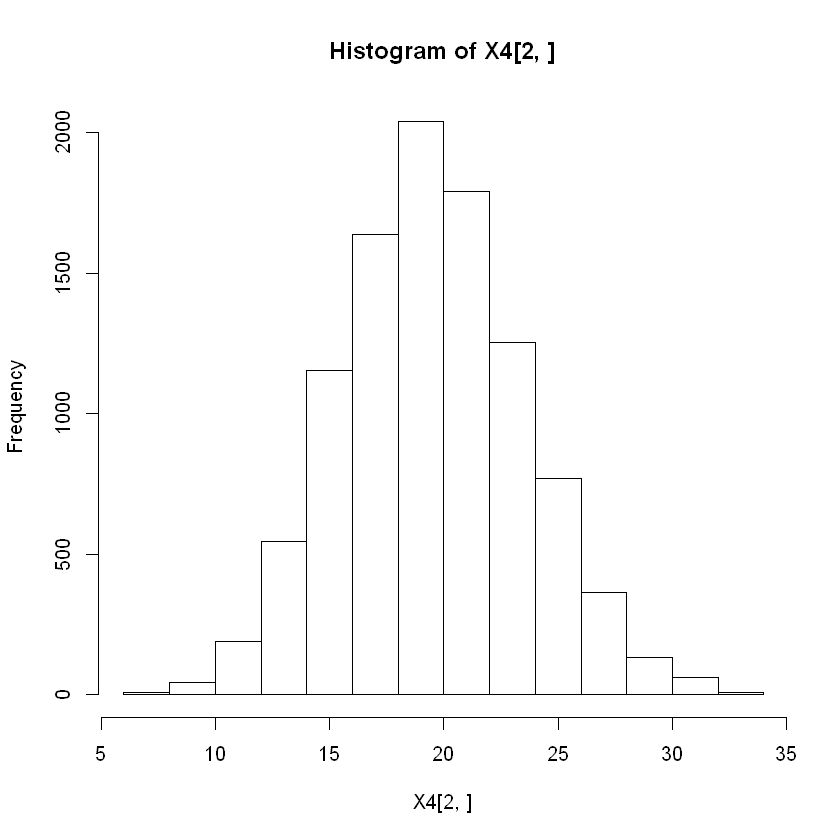

In [39]:
hist(X4[2,])

可以想见，当size足够大时，多项分布本身会直接趋近某个多元正态分布。其结果就是可以$X'\Sigma^{-1}X$将服从$\chi^2(len(P))$。其中$len(P)$是多项分布的项数，或者说概率向量的长度。

In [40]:
X4[,1]

[1] 14 20 27 39

In [41]:
#t(X4) %*% solve(Cov.multinom(100,c(0.1,0.2,0.3,0.4))) %*% X4

#Error in solve.default(Cov.multinom(100, c(0.1, 0.2, 0.3, 0.4))): 系统计算上是奇异的: 倒条件数=5.55112e-17
#Traceback:
#
#1. solve(Cov.multinom(100, c(0.1, 0.2, 0.3, 0.4)))
#2. solve.default(Cov.multinom(100, c(0.1, 0.2, 0.3, 0.4)))


In [42]:
mat <- Cov.multinom(100,c(0.1,0.2,0.3,0.4))
mat

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [43]:
mat[1,]+mat[2,]+mat[3,]

[1]   4   8  12 -24

我们发现多项分布的协方差矩阵并非满秩，从而也就不能利用公式$X'\Sigma X$得到服从卡方分布的统计量了。这是因为这些变量显然受到了额外的线性约束：

$$
\sum_{i=1}^n X_i = n
$$

这里n是变量个数，也就是`rmultinom`的`prob`的向量维数，不是指它的`n`参数，那个指的是样本规模。

这个关系的一个体现就是我们上面得到的

$$
Cov_{1.} + Cov_{2.} + Cov{3.} = -Cov{4.}
$$

这似乎可以看成自由度的一个解释，这个约束降低了一自由度，则当然不可能可以产生出自由度为n的卡方分布。
另一方面，我们注意到只要省掉一个变量，就可以生成自由度为n-1的卡方分布。



In [44]:
eigen(mat)

-0.03994221,-0.09455956,0.8599204,-0.5
-0.13346931,-0.76609293,-0.3811661,-0.5
-0.60811608,0.56032384,-0.2573558,-0.5
0.78152760,0.30032865,-0.2213985,-0.5


In [45]:
eigen(mat,symmetric=TRUE)

-0.03994221,-0.09455956,0.8599204,-0.5
-0.13346931,-0.76609293,-0.3811661,-0.5
-0.60811608,0.56032384,-0.2573558,-0.5
0.78152760,0.30032865,-0.2213985,-0.5


In [46]:
mat

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [47]:
res <- eigen(mat)
P <- res$vectors
lam <- res$values

In [48]:
P %*% diag(lam) %*% t(P)

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [49]:
P[,1:3] %*% diag(lam[1:3]) %*% t(P[,1:3])

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [50]:
P[,1:2] %*% diag(lam[1:2]) %*% t(P[,1:2])

0.2638300,1.872372,-0.3854508,-1.750751
1.8723717,14.283543,-7.1589182,-8.996996
-0.3854508,-7.158918,20.2175212,-12.673152
-1.7507509,-8.996996,-12.6731522,23.420899


$$
Y = (P \Lambda^{\frac{1}{2}})^{-1} (X - E(X)) \\
$$

In [51]:
solve(P %*% sqrt(diag(lam)))

-6.760356e-03,-2.259013e-02,-1.029257e-01,1.322762e-01
-1.959904e-02,-1.587855e-01,1.161364e-01,6.224809e-02
2.501820e-01,-1.108950e-01,-7.487412e-02,-6.441284e-02
-2.652711e+06,-2.652711e+06,-2.652711e+06,-2.652711e+06


In [52]:
Y <- solve(P %*% sqrt(diag(lam))) %*% (X4 - apply(X4,1,mean)) 

In [53]:
rr<-cov(t(Y))

In [54]:
rr

9.936323e-01,-1.419811e-02,1.692226e-02,-3.548297e-09
-1.419811e-02,9.976788e-01,2.164742e-03,-1.871571e-09
1.692226e-02,2.164742e-03,9.910830e-01,-3.128985e-08
-3.548297e-09,-1.871571e-09,-3.128985e-08,1.002069e-15


In [55]:
apply(Y,1,mean)

[1] -2.185009e-16 -3.919942e-16  5.286318e-17  4.653297e-09

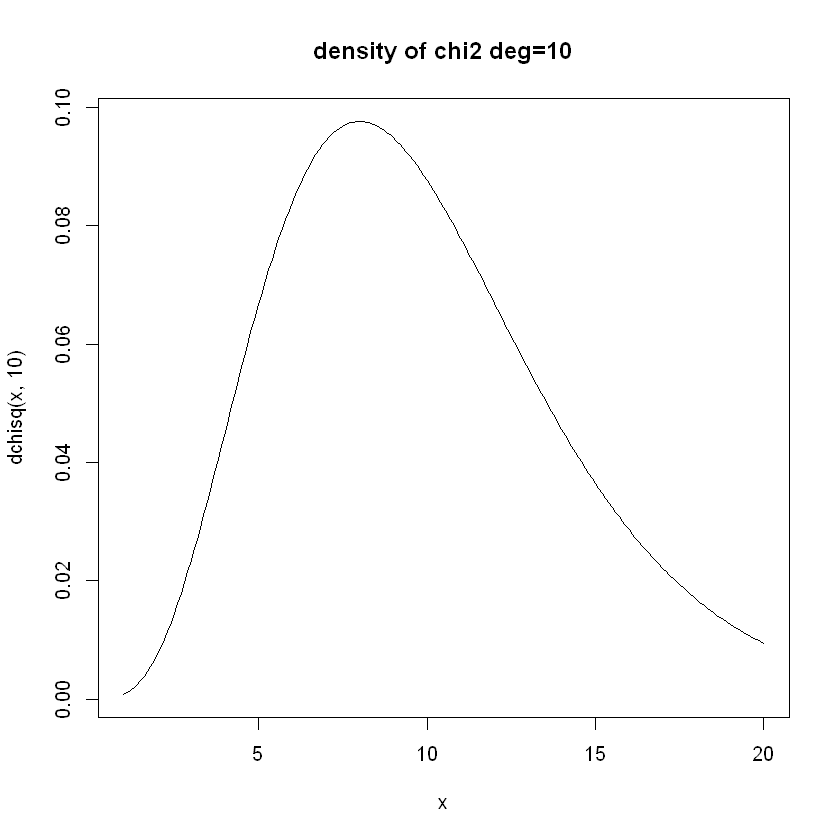

In [56]:
x <- seq(1,20,0.1)
plot(x,dchisq(x,10),type="l",main="density of chi2 deg=10")

In [57]:
res<-apply(Y**2,1,sum)

In [58]:
str(Y)

 num [1:4, 1:10000] 1.50e-01 -4.87e-01 1.29 -3.49e-08 -5.67e-01 ...


In [59]:
str(X4)

 int [1:4, 1:10000] 14 20 27 39 14 14 34 38 11 25 ...


In [60]:
str(rmultinom(10000,100,c(0.1,0.2,0.3,0.4))) # n,size,prob

 int [1:4, 1:10000] 8 18 31 43 10 24 25 41 11 21 ...


In [61]:
library(MASS)

In [63]:
mvrnorm(5, mu = c(3, 5), Sigma = matrix(c(1, 0.5, 0.5, 2), nrow = 2))
# Why do you change the interface to rmultinom?

4.578052,5.099846
3.308749,5.389923
2.984122,6.513884
3.716570,4.820906
3.753424,6.930424


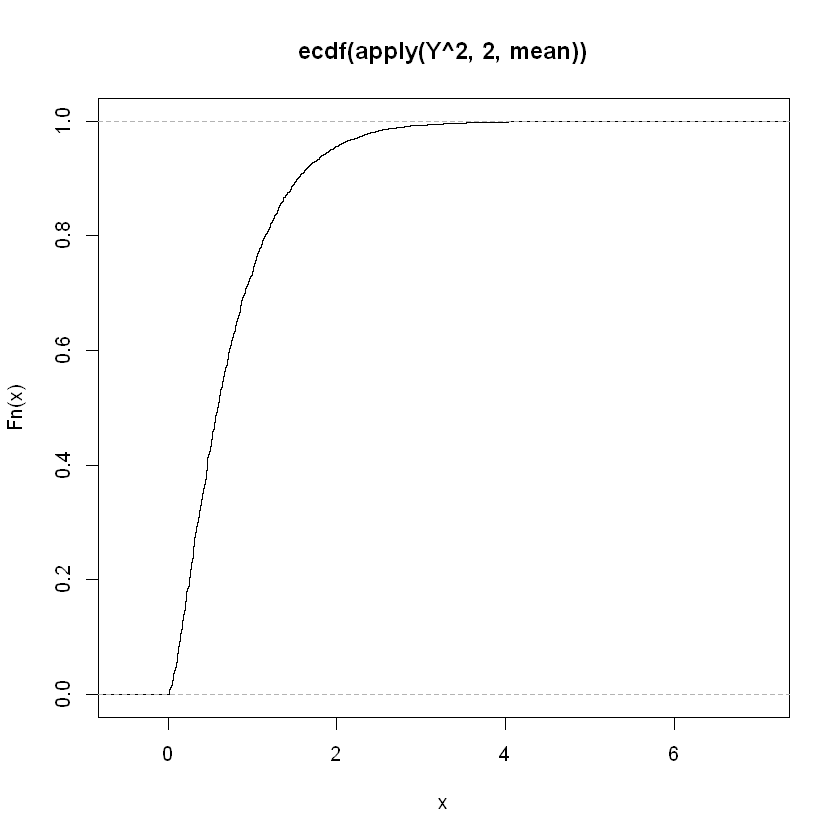

In [64]:
plot(ecdf(apply(Y**2,2,mean)))

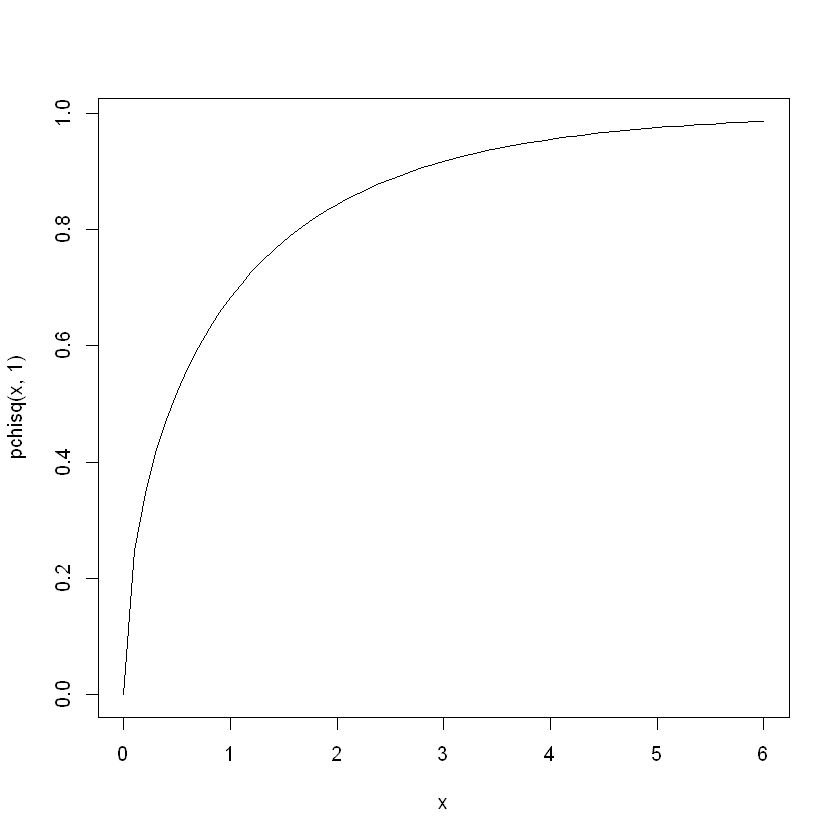

In [65]:
x <- seq(0,6,0.1)
plot(x,pchisq(x,1),type='l')

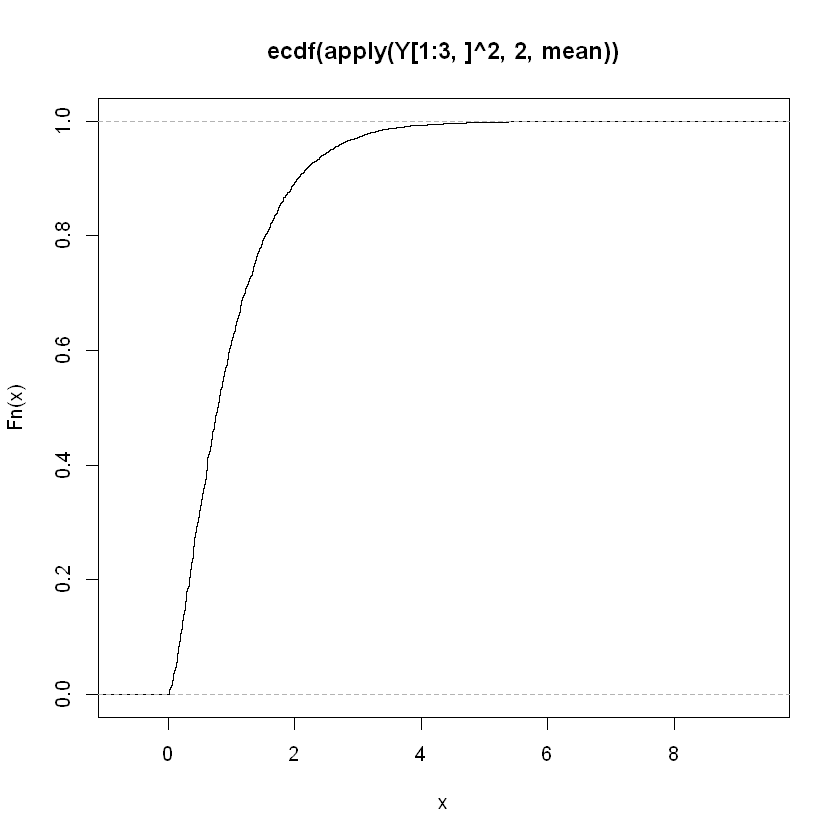

In [66]:
plot(ecdf(apply(Y[1:3,]**2,2,mean)))

In [67]:
ks.test(apply(Y**2,2,mean),pchisq,3)

Warning message in ks.test(apply(Y^2, 2, mean), pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  apply(Y^2, 2, mean)
D = 0.57842, p-value < 2.2e-16
alternative hypothesis: two-sided


In [68]:
ks.test(apply(Y**2,2,sum),pchisq,3)

Warning message in ks.test(apply(Y^2, 2, sum), pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  apply(Y^2, 2, sum)
D = 0.011569, p-value = 0.1375
alternative hypothesis: two-sided


In [69]:
ks.test(rnorm(10000,1,2),pnorm,1,2)


	One-sample Kolmogorov-Smirnov test

data:  rnorm(10000, 1, 2)
D = 0.0088675, p-value = 0.4113
alternative hypothesis: two-sided


In [70]:
ks.test(pchisq(10000,3),pchisq,3)


	One-sample Kolmogorov-Smirnov test

data:  pchisq(10000, 3)
D = 0.80125, p-value = 0.3975
alternative hypothesis: two-sided


In [71]:
X <- rmultinom(10000,100,c(0.1,0.2,0.3,0.4))
mat <- cov(t(X))
res <- eigen(mat)
P <- res$vectors
lam <- res$values

A <- solve(P %*% diag(sqrt(lam)))

Y <- A %*% (X - apply(X,1,mean))

In [72]:
apply(Y,1,mean)

[1] -2.555827e-16 -3.388557e-16  3.083429e-16  4.145032e-09

In [73]:
cov(t(Y))

1.000000e+00,2.048466e-16,-3.062005e-16,-5.338872e-09
2.048466e-16,1.000000e+00,-3.871220e-16,-5.927598e-09
-3.062005e-16,-3.871220e-16,1.000000e+00,-2.733188e-08
-5.338872e-09,-5.927598e-09,-2.733188e-08,8.123516e-16


In [74]:
ks.res <- ks.test(apply((Y**2),2,sum),pchisq,3)
ks.res

Warning message in ks.test(apply((Y^2), 2, sum), pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  apply((Y^2), 2, sum)
D = 0.012297, p-value = 0.09716
alternative hypothesis: two-sided


In [75]:
unclass(ks.res)

$statistic
         D 
0.01229724 

$p.value
[1] 0.09715851

$alternative
[1] "two-sided"

$method
[1] "One-sample Kolmogorov-Smirnov test"

$data.name
[1] "apply((Y^2), 2, sum)"

In [76]:
ks.res$p.value

[1] 0.09715851

In [77]:
experiment <- function(n = 10000,size = 100,prob = c(0.1,0.2,0.3,0.4)){
    X <- rmultinom(n, size, prob);
    mat <- cov(t(X));
    res <- eigen(mat);
    P <- res$vectors;
    lam <- res$values;

    A <- solve(P %*% diag(sqrt(lam)));

    Y <- A %*% (X - apply(X,1,mean));
    ks.res <- ks.test(apply((Y**2),2,sum),pchisq,length(prob)-1);
    return(ks.res$p.value);
}

In [78]:
rep.exp <- replicate(100,experiment())

Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum), pchisq, length(prob) - 1):
"ties should not be present for the Kolmogorov-Smirnov test"Warning message in ks.test(apply((Y^2), 2, sum),

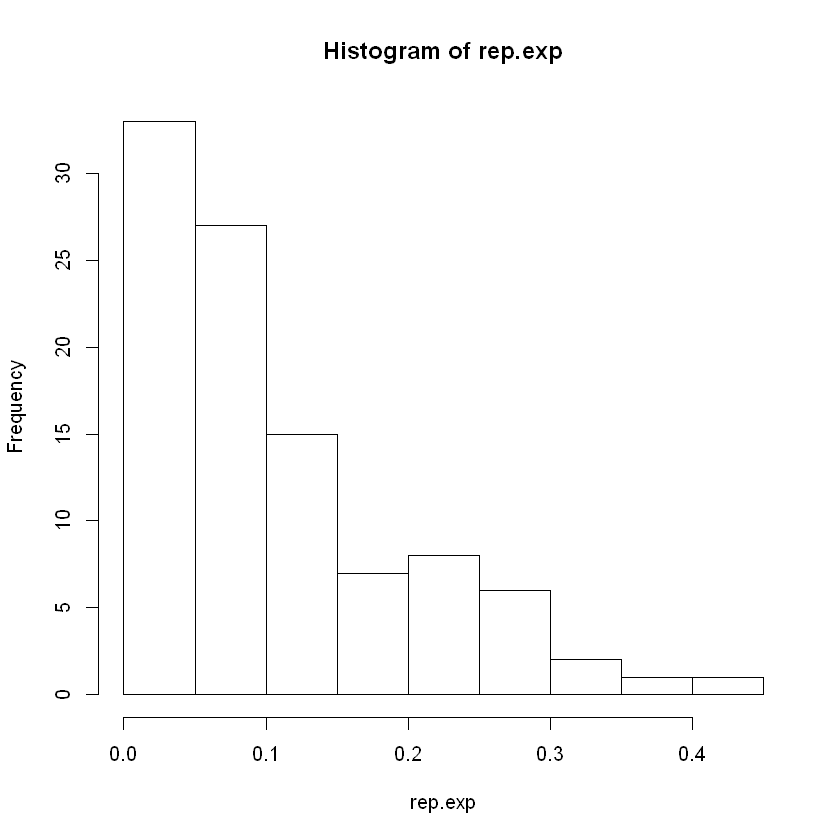

In [79]:
hist(rep.exp)

In [80]:
P

-0.04663661,-0.07418189,0.8615811,-0.5
-0.13208718,-0.77462908,-0.3640093,-0.5
-0.60504682,0.55518547,-0.2751135,-0.5
0.78377060,0.29362550,-0.2224583,-0.5


In [81]:
lam

[1] 3.501840e+01 2.337789e+01 1.174766e+01 4.263256e-14

In [82]:
mat

8.925356,-2.125250,-2.759264,-4.040842
-2.125250,16.195473,-6.078874,-7.991350
-2.759264,-6.078874,20.914533,-12.076396
-4.040842,-7.991350,-12.076396,24.108587


In [83]:
P %*% diag(lam) %*% t(P)

8.925356,-2.125250,-2.759264,-4.040842
-2.125250,16.195473,-6.078874,-7.991350
-2.759264,-6.078874,20.914533,-12.076396
-4.040842,-7.991350,-12.076396,24.108587


In [84]:
P[,1:3] %*% diag(lam[1:3]) %*% t(P[,1:3])

8.925356,-2.125250,-2.759264,-4.040842
-2.125250,16.195473,-6.078874,-7.991350
-2.759264,-6.078874,20.914533,-12.076396
-4.040842,-7.991350,-12.076396,24.108587


In [85]:
P2 <- P
P2[,4] = c(0,0,0,0)

lam2 <- lam
lam2[4] <- 0



In [86]:
P2 %*% diag(lam2) %*% t(P2)

8.925356,-2.125250,-2.759264,-4.040842
-2.125250,16.195473,-6.078874,-7.991350
-2.759264,-6.078874,20.914533,-12.076396
-4.040842,-7.991350,-12.076396,24.108587


In [87]:
M <- P2 %*% diag(sqrt(lam2))

In [88]:
t(M) %*% M

3.501840e+01,-1.776357e-15,-1.332268e-15,0
-1.776357e-15,2.337789e+01,1.332268e-15,0
-1.332268e-15,1.332268e-15,1.174766e+01,0
0.000000e+00,0.000000e+00,0.000000e+00,0


In [89]:
lam2

[1] 35.01840 23.37789 11.74766  0.00000

In [90]:
Y2 <- t(P2 %*% diag(sqrt(1/lam2))) %*% X

In [91]:
cov(t(Y2))

1.000000e+00,8.433782e-17,-3.396729e-16,NA
8.433782e-17,1.000000e+00,-8.861312e-18,NA
-3.396729e-16,-8.861312e-18,1.000000e+00,NA
NA,NA,NA,NA


In [92]:
cov(t(X))

8.925356,-2.125250,-2.759264,-4.040842
-2.125250,16.195473,-6.078874,-7.991350
-2.759264,-6.078874,20.914533,-12.076396
-4.040842,-7.991350,-12.076396,24.108587


In [93]:
P2

-0.04663661,-0.07418189,0.8615811,0
-0.13208718,-0.77462908,-0.3640093,0
-0.60504682,0.55518547,-0.2751135,0
0.78377060,0.29362550,-0.2224583,0


In [94]:
lam2

[1] 35.01840 23.37789 11.74766  0.00000

In [95]:
 t(P2 %*% diag(sqrt(1/lam2)))

-0.007880954,-0.02232094,-0.10224471,0.13244660
-0.015342468,-0.16021055,0.11482472,0.06072830
0.251374130,-0.10620302,-0.08026687,-0.06490424
NaN,NaN,NaN,NaN


In [96]:
t(P2[,1:3] %*% diag(sqrt(1/lam2[1:3])))

-0.007880954,-0.02232094,-0.10224471,0.13244660
-0.015342468,-0.16021055,0.11482472,0.06072830
0.251374130,-0.10620302,-0.08026687,-0.06490424


In [97]:
M2 <- rbind(t(P2[,1:3] %*% diag(sqrt(1/lam2[1:3]))),c(0,0,0,0))
M2

-0.007880954,-0.02232094,-0.10224471,0.13244660
-0.015342468,-0.16021055,0.11482472,0.06072830
0.251374130,-0.10620302,-0.08026687,-0.06490424
0.000000000,0.00000000,0.00000000,0.00000000


In [98]:
Y3 <- M2 %*% X
cov(t(Y3))

1.000000e+00,8.299739e-17,-3.320316e-16,0
8.299739e-17,1.000000e+00,-6.063411e-18,0
-3.320316e-16,-6.063411e-18,1.000000e+00,0
0.000000e+00,0.000000e+00,0.000000e+00,0


In [99]:
cbind(c(1,2,3),c(4,5,6))

1,4
2,5
3,6


In [100]:
M2

-0.007880954,-0.02232094,-0.10224471,0.13244660
-0.015342468,-0.16021055,0.11482472,0.06072830
0.251374130,-0.10620302,-0.08026687,-0.06490424
0.000000000,0.00000000,0.00000000,0.00000000


In [101]:
Y4 <- M2 %*% (X - apply(X,1,mean))

In [102]:
apply(Y4,1,mean)

[1] -2.392962e-16 -3.490066e-16  3.301042e-16  0.000000e+00

In [103]:
cov(t(Y4))

1.000000e+00,1.035691e-16,-3.440294e-16,0
1.035691e-16,1.000000e+00,-1.535477e-17,0
-3.440294e-16,-1.535477e-17,1.000000e+00,0
0.000000e+00,0.000000e+00,0.000000e+00,0


In [104]:
ks.test(apply(Y4**2,2,sum),pchisq,3)

Warning message in ks.test(apply(Y4^2, 2, sum), pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  apply(Y4^2, 2, sum)
D = 0.012297, p-value = 0.09716
alternative hypothesis: two-sided


$$
\Sigma = P A P^T
$$

定义逆的一种扩展，普通逆使得$A^{-1}A=I_n$。其中n表示对角元上n个元素全是1，我们扩展使得n可以取其他数，分别称为n-逆。有了这个定义，
就可以考虑不满秩协方差矩阵如何简单的导出变换矩阵了。

在协方差矩阵本身不满秩情况下，分解式中矩阵P最后一列虽然对于重建协方差矩阵是没用的，但是这列的值使得P可以成为一个正交矩阵，而做上面的全设为0变换后，就可能不能维持作为正交矩阵的性质了。

$$
M = (P Q(\Lambda))^T \\
$$
其中Q(\Lambda)表示将特征值对角矩阵上所有非零元素取倒数再取开方。于是有性质

$$
Q(\Lambda) \Lambda Q(\Lambda) = I_r
$$

r即特征值对角矩阵非零元个数。或者说自由度

$$
\Sigma(MX) = M\Sigma(X) M^T = Q(\Lambda) P^T P A P^T P Q(\Lambda) = I_r 
$$

这正是我们想要的性质。
用类似$X^T\Sigma X$的记法有

$$
Y^TY = X^T M^T M X = X^T P Q(\Lambda) Q(\Lambda) P^T X
$$

In [105]:
P %*% t(P)

1.000000e+00,0.000000e+00,5.551115e-17,-5.551115e-17
0.000000e+00,1.000000e+00,1.110223e-16,2.498002e-16
5.551115e-17,1.110223e-16,1.000000e+00,2.775558e-17
-5.551115e-17,2.498002e-16,2.775558e-17,1.000000e+00


注意特征分解暗示了一个简单地的逆方法

$$
\Sigma = P\Lambda P^T \\
(P\Lambda^{-1}P^T ) (P \Lambda P^T) = (P\Lambda^{-1}P^T ) \Sigma = I 
$$

所以只要特征值矩阵$\Lambda$取逆代回去就可以得到一个逆，由于$\Lambda$是对角矩阵，所以只需要取倒数即可。

在上面提到的那种广义逆中，我们把对角线上全部元取倒数改为非0元取倒数。

In [106]:
res

-0.04663661,-0.07418189,0.8615811,-0.5
-0.13208718,-0.77462908,-0.3640093,-0.5
-0.60504682,0.55518547,-0.2751135,-0.5
0.78377060,0.29362550,-0.2224583,-0.5


In [107]:
c(1/lam[1:3],0)

[1] 0.02855642 0.04277545 0.08512337 0.00000000

In [108]:
CM<- P %*% diag(c(1/lam[1:3],0)) %*% t(P)
CM

0.06348645,-0.02406276,-0.021132923,-0.018290774
-0.02406276,0.03744473,-0.007589350,-0.005792620
-0.02113292,-0.00758935,0.030081467,-0.001359194
-0.01829077,-0.00579262,-0.001359194,0.025442588


In [109]:
str(t(X) %*% CM %*% X)

 num [1:10000, 1:10000] 49 33.2 34.6 37.2 20 ...


In [110]:
l <- c()
l

NULL

In [111]:
l <- c(l,1)
l

[1] 1

In [112]:
l <- c(l,2)
l

[1] 1 2

In [113]:
for(i in c(1,2,3)){
    l <- c(l,i)
}

In [114]:
l

[1] 1 2 1 2 3

In [115]:
l <- c()
mu <- apply(X,1,mean)
for(i in 1:10000){
    x <- X[,i] - mu;
    chi2 <- t(x) %*% CM %*% x;
    l <- c(l, chi2);
}

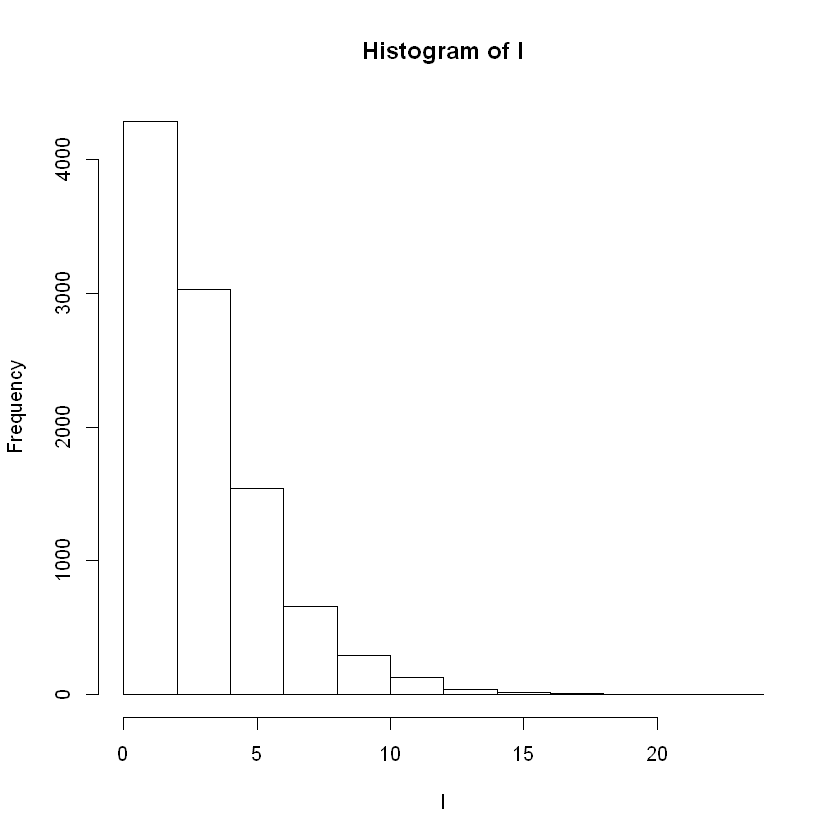

In [116]:
hist(l)

In [117]:
mu

[1] 10.0209 20.0353 29.9707 39.9731

In [118]:
head(l)

[1] 3.83229466 0.76426490 1.39156905 0.07735605 6.98112743 1.11282941

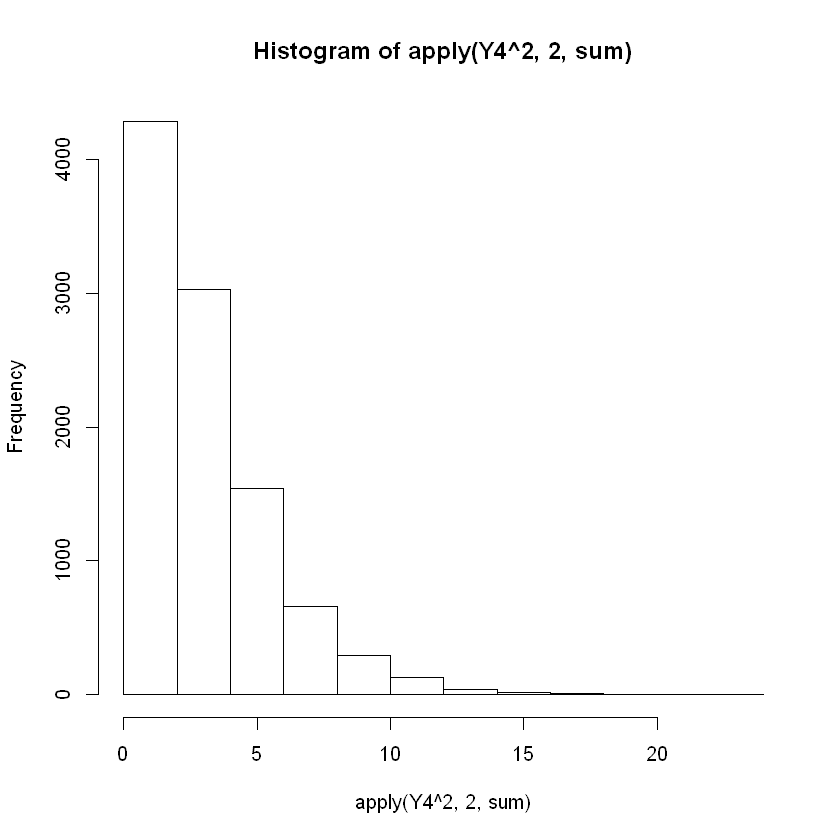

In [119]:
hist(apply(Y4**2,2,sum))

In [120]:
i=1

In [121]:
x <- X[,i] - mu;
chi2 <- t(x) %*% CM %*% x;

In [122]:
chi2

3.832295


In [123]:
ks.test(l,pchisq,3)

Warning message in ks.test(l, pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  l
D = 0.012297, p-value = 0.09716
alternative hypothesis: two-sided


In [124]:
ks.test(apply(Y4**2,2,sum),pchisq,3)

Warning message in ks.test(apply(Y4^2, 2, sum), pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  apply(Y4^2, 2, sum)
D = 0.012297, p-value = 0.09716
alternative hypothesis: two-sided


In [125]:
mat

8.925356,-2.125250,-2.759264,-4.040842
-2.125250,16.195473,-6.078874,-7.991350
-2.759264,-6.078874,20.914533,-12.076396
-4.040842,-7.991350,-12.076396,24.108587


In [126]:
theory_E <- E.multinom(100,c(0.1,0.2,0.3,0.4))
theory_cov <- Cov.multinom(100,c(0.1,0.2,0.3,0.4))

In [127]:
theory_E

[1] 10 20 30 40

In [128]:
theory_cov

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [162]:
res <- eigen(theory_cov)
Qlam <- c(1/sqrt(res$values[1:3]),0)


In [163]:
res$vectors %*% diag(res$values) %*% t(res$vectors)

9,-2,-3,-4
-2,16,-6,-8
-3,-6,21,-12
-4,-8,-12,24


In [164]:
M <- t(res$vectors %*% diag(Qlam))

Y <- M %*% (X - theory_E)

In [168]:
ks.test(apply(Y**2,2,sum),pchisq,3)

Warning message in ks.test(apply(Y^2, 2, sum), pchisq, 3):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  apply(Y^2, 2, sum)
D = 0.015248, p-value = 0.01912
alternative hypothesis: two-sided


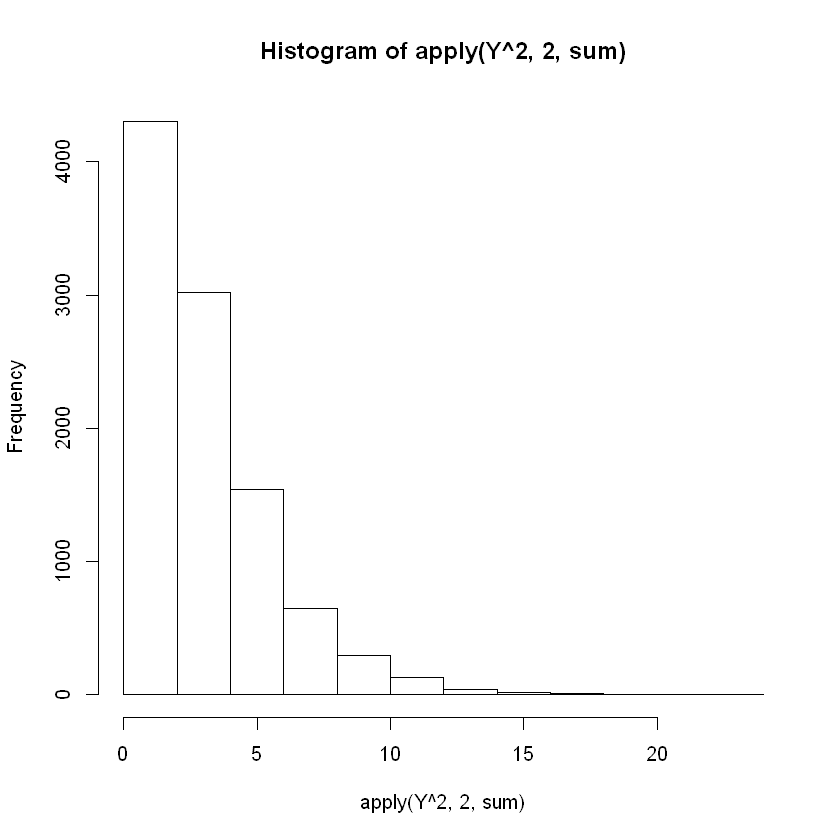

In [169]:
hist(apply(Y**2,2,sum))

In [170]:
apply(X,1,mean)

[1] 10.0209 20.0353 29.9707 39.9731

In [171]:
cov(t(Y))

1.0031224080,0.0008766751,-0.008698281,0
0.0008766751,1.0040253513,0.016513900,0
-0.0086982806,0.0165139004,0.995027266,0
0.0000000000,0.0000000000,0.000000000,0


In [172]:
cov(t(Y4))

1.000000e+00,1.035691e-16,-3.440294e-16,0
1.035691e-16,1.000000e+00,-1.535477e-17,0
-3.440294e-16,-1.535477e-17,1.000000e+00,0
0.000000e+00,0.000000e+00,0.000000e+00,0


In [153]:
apply(Y,1,mean)

[1] -0.0002507032 -0.0022990041  0.0015247169  0.0000000000

In [154]:
apply(Y4,1,mean)

[1] -2.392962e-16 -3.490066e-16  3.301042e-16  0.000000e+00

In [179]:
NX <- mvrnorm(1000, mu = theory_E, Sigma = theory_cov)

In [180]:
MNX <- t(M %*% t(NX))
head(MNX)

2.643408,3.6236796,-5.183298,0
1.529075,0.8332875,-5.972953,0
1.741782,3.5802289,-3.687732,0
2.667100,2.6674666,-5.147701,0
2.034125,2.2074334,-3.784894,0
2.732710,3.1909702,-4.918594,0


In [181]:
cov(MNX)

1.05239422,0.06020679,-0.02500019,0
0.06020679,1.01768782,-0.08279688,0
-0.02500019,-0.08279688,1.01297528,0
0.00000000,0.00000000,0.00000000,0


In [182]:
M

-0.006760356,-0.02259013,-0.10292572,0.13227621
-0.019599035,-0.15878545,0.11613640,0.06224809
0.250181951,-0.11089499,-0.07487412,-0.06441284
0.000000000,0.00000000,0.00000000,0.00000000


In [188]:
res.sample <- eigen(cov(NX))
MS <- t(res.sample$vectors %*% diag(c(sqrt(1/res.sample$values[1:3]),0)))
MSNX <- t(MS %*% t(NX))
cov(MSNX)

1.000000e+00,8.445050e-17,1.952387e-16,0
8.445050e-17,1.000000e+00,1.699762e-16,0
1.952387e-16,1.699762e-16,1.000000e+00,0
0.000000e+00,0.000000e+00,0.000000e+00,0


In [189]:
res.sample

0.07542985,-0.1827077,0.8431656,-0.5
0.22208629,-0.6947430,-0.4669152,-0.5
0.52233435,0.6612002,-0.1999527,-0.5
-0.81985050,0.2162505,-0.1762977,-0.5


In [190]:
res

-0.03994221,-0.09455956,0.8599204,-0.5
-0.13346931,-0.76609293,-0.3811661,-0.5
-0.60811608,0.56032384,-0.2573558,-0.5
0.78152760,0.30032865,-0.2213985,-0.5


In [191]:
M

-0.006760356,-0.02259013,-0.10292572,0.13227621
-0.019599035,-0.15878545,0.11613640,0.06224809
0.250181951,-0.11089499,-0.07487412,-0.06441284
0.000000000,0.00000000,0.00000000,0.00000000


In [192]:
MS

0.01240436,0.03652185,0.08589732,-0.13482353
-0.03760063,-0.14297581,0.13607281,0.04450363
0.24540314,-0.13589554,-0.05819619,-0.05131141
0.00000000,0.00000000,0.00000000,0.00000000


In [215]:
standard.MNX <- M %*% (t(NX)-theory_E)
standard.MSNX <- MS %*% (t(NX)-apply(NX,2,mean))

In [216]:
ks.test(apply(standard.MNX**2,2,sum),pchisq,3)


	One-sample Kolmogorov-Smirnov test

data:  apply(standard.MNX^2, 2, sum)
D = 0.018732, p-value = 0.8742
alternative hypothesis: two-sided


In [220]:
ks.test(apply(standard.MSNX**2,2,sum),pchisq,3)


	One-sample Kolmogorov-Smirnov test

data:  apply(standard.MSNX^2, 2, sum)
D = 0.013676, p-value = 0.9921
alternative hypothesis: two-sided


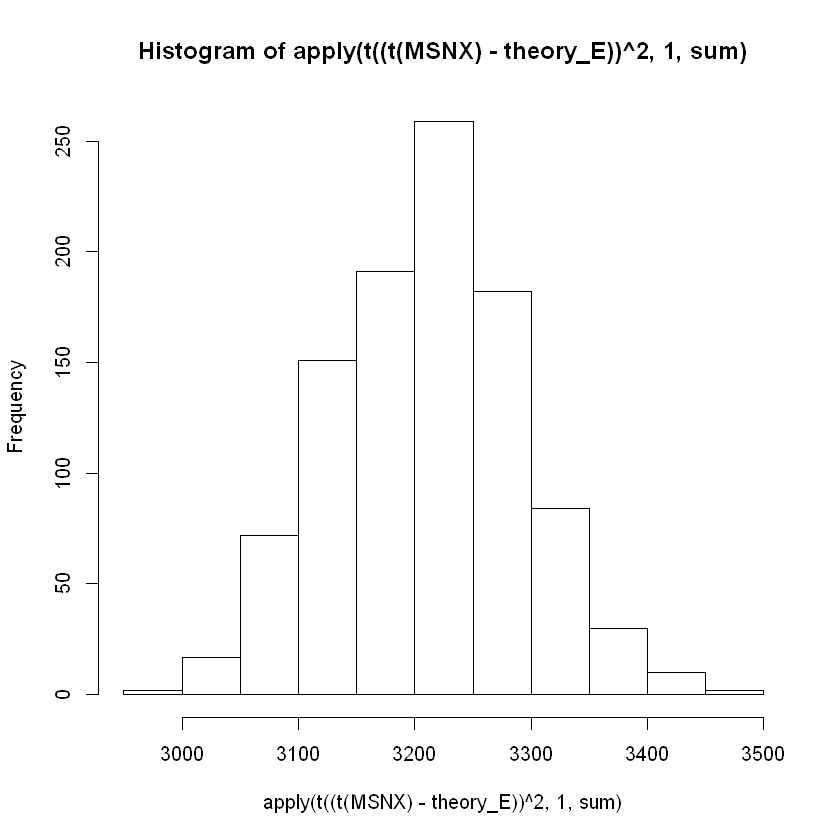

In [209]:
hist(apply(t((t(MSNX)-theory_E))**2,1,sum))

In [210]:
head(MSNX)

-3.001435,3.520727,-4.520178,0
-1.651003,1.033745,-5.771603,0
-2.105673,3.507370,-3.059928,0
-2.924450,2.578975,-4.636002,0
-2.246180,2.125116,-3.368043,0
-3.038427,3.062445,-4.323827,0


In [212]:
apply(MSNX,2,mean)

[1] -1.958300  2.614084 -4.078255  0.000000

In [213]:
apply(MNX,2,mean)

[1]  1.681841  2.587871 -4.552600  0.000000